In [1]:
pwd

'/home/ec2-user/aix360/AIX-UGR'

# Read the CSV file

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd


df = pd.read_csv("aix360/data/heloc_data/selected_100_blacklist_10_parsed_2.csv")


## Encode target variable as 0,1

In [3]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['Label'] = enc.fit_transform(df['Label'])

In [4]:
df.shape

(120010, 12)

### DF info and Non-Null count

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120010 entries, 0 to 120009
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Label             120010 non-null  int64  
 1   Timestamp         120010 non-null  int64  
 2   FlowDuration      120010 non-null  float64
 3   SrcIP             120010 non-null  int64  
 4   DstIP             120010 non-null  int64  
 5   SrcPort           120010 non-null  int64  
 6   DstPort           120010 non-null  int64  
 7   Protocol          120010 non-null  int64  
 8   ForwardingStatus  120010 non-null  int64  
 9   TypeofService     120010 non-null  int64  
 10  PacketExed        120010 non-null  int64  
 11  Bytes             120008 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 11.0 MB


In [6]:
df.head()

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,ForwardingStatus,TypeofService,PacketExed,Bytes
0,1,39160,0.0,2144091225,719034713,123,425,2,0,0,1,76.0
1,1,39160,0.0,2403862665,719034988,53,41294,2,0,0,1,NaN
2,1,39160,0.0,2403862665,719034988,53,46784,2,0,0,1,141.0
3,1,39160,0.0,2403862665,719036065,53,35972,2,0,0,1,113.0
4,1,39160,0.0,2403862665,719036068,53,41853,2,0,0,1,103.0


## Remove missing data or values with NaN

In [7]:
df = df.loc[(df >= 0).all(axis=1)]

In [8]:
df.shape

(120008, 12)

In [9]:
df.columns

Index(['Label', 'Timestamp', 'FlowDuration', 'SrcIP', 'DstIP', 'SrcPort',
       'DstPort', 'Protocol', 'ForwardingStatus', 'TypeofService',
       'PacketExed', 'Bytes'],
      dtype='object')

# Unique Values

In [10]:
df.nunique()

Label                   2
Timestamp            8707
FlowDuration         5760
SrcIP               21200
DstIP                2731
SrcPort             35765
DstPort             25825
Protocol                6
ForwardingStatus        1
TypeofService          25
PacketExed            723
Bytes                8881
dtype: int64

# Drop Duplicates

In [11]:
data = df[['SrcIP', 'DstIP']].drop_duplicates()

In [12]:
len(data)

30798

In [48]:
len(df[['Label','Timestamp','FlowDuration','SrcIP', 'DstIP','SrcPort','DstPort','Protocol','TypeofService','PacketExed']].drop_duplicates())

120008

In [14]:
data

,SrcIP,DstIP
0,2144091225,719034713
2,2403862665,719034988
3,2403862665,719036065
4,2403862665,719036068
5,2403862665,719036247
...,...,...
115034,1816330239,719035604
115275,3230619487,719035607
116876,3229035394,719035605
116879,3229035394,719035607


In [15]:
srcIP_count = df['SrcIP'].value_counts()

In [16]:
srcIP_count.head(10)

2403862665    12174
1148671665     3635
1545504263     2503
1816330239     1936
2403861754     1814
1816330183     1703
1816330178     1526
3746621224      864
3230619482      764
1010349080      716
Name: SrcIP, dtype: int64

In [17]:
srcIP_count.value_counts()

1       12562
2        3076
3        1183
4         822
5         507
        ...  
118         1
2503        1
566         1
1526        1
271         1
Name: SrcIP, Length: 159, dtype: int64

In [18]:
dupe_mask = srcIP_count >= 2

In [19]:
dupe_mask[0:5]

2403862665    True
1148671665    True
1545504263    True
1816330239    True
2403861754    True
Name: SrcIP, dtype: bool

In [20]:
srcIP_count.index[0:5]

Int64Index([2403862665, 1148671665, 1545504263, 1816330239, 2403861754], dtype='int64')

In [21]:
dupe_ids = srcIP_count.index[dupe_mask]

In [22]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

8638

In [23]:
dupe_ids[0:5]

[2403862665, 1148671665, 1545504263, 1816330239, 2403861754]

In [24]:
df.loc[df['SrcIP'].isin(dupe_ids[0:3]),:].head(10)

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,ForwardingStatus,TypeofService,PacketExed,Bytes
2,1,39160,0.0,2403862665,719034988,53,46784,2,0,0,1,141.0
3,1,39160,0.0,2403862665,719036065,53,35972,2,0,0,1,113.0
4,1,39160,0.0,2403862665,719036068,53,41853,2,0,0,1,103.0
5,1,39160,0.0,2403862665,719036247,53,49429,2,0,0,1,152.0
59,1,39161,0.0,2403862665,719034876,53,54436,2,0,0,1,96.0
60,1,39161,0.0,2403862665,719034988,53,39867,2,0,0,1,80.0
61,1,39161,0.0,2403862665,719034988,53,41847,2,0,0,1,96.0
62,1,39161,0.0,2403862665,719034988,53,42890,2,0,0,1,86.0
63,1,39161,0.0,2403862665,719034988,53,47476,2,0,0,1,127.0
64,1,39161,0.0,2403862665,719034988,53,48810,2,0,0,1,125.0


## Exploring the features

In [25]:
import matplotlib.pyplot as plt #import plotting package

#render plotting automatically
%matplotlib inline

import matplotlib as mpl #additional plotting functionality

mpl.rcParams['figure.dpi'] = 400

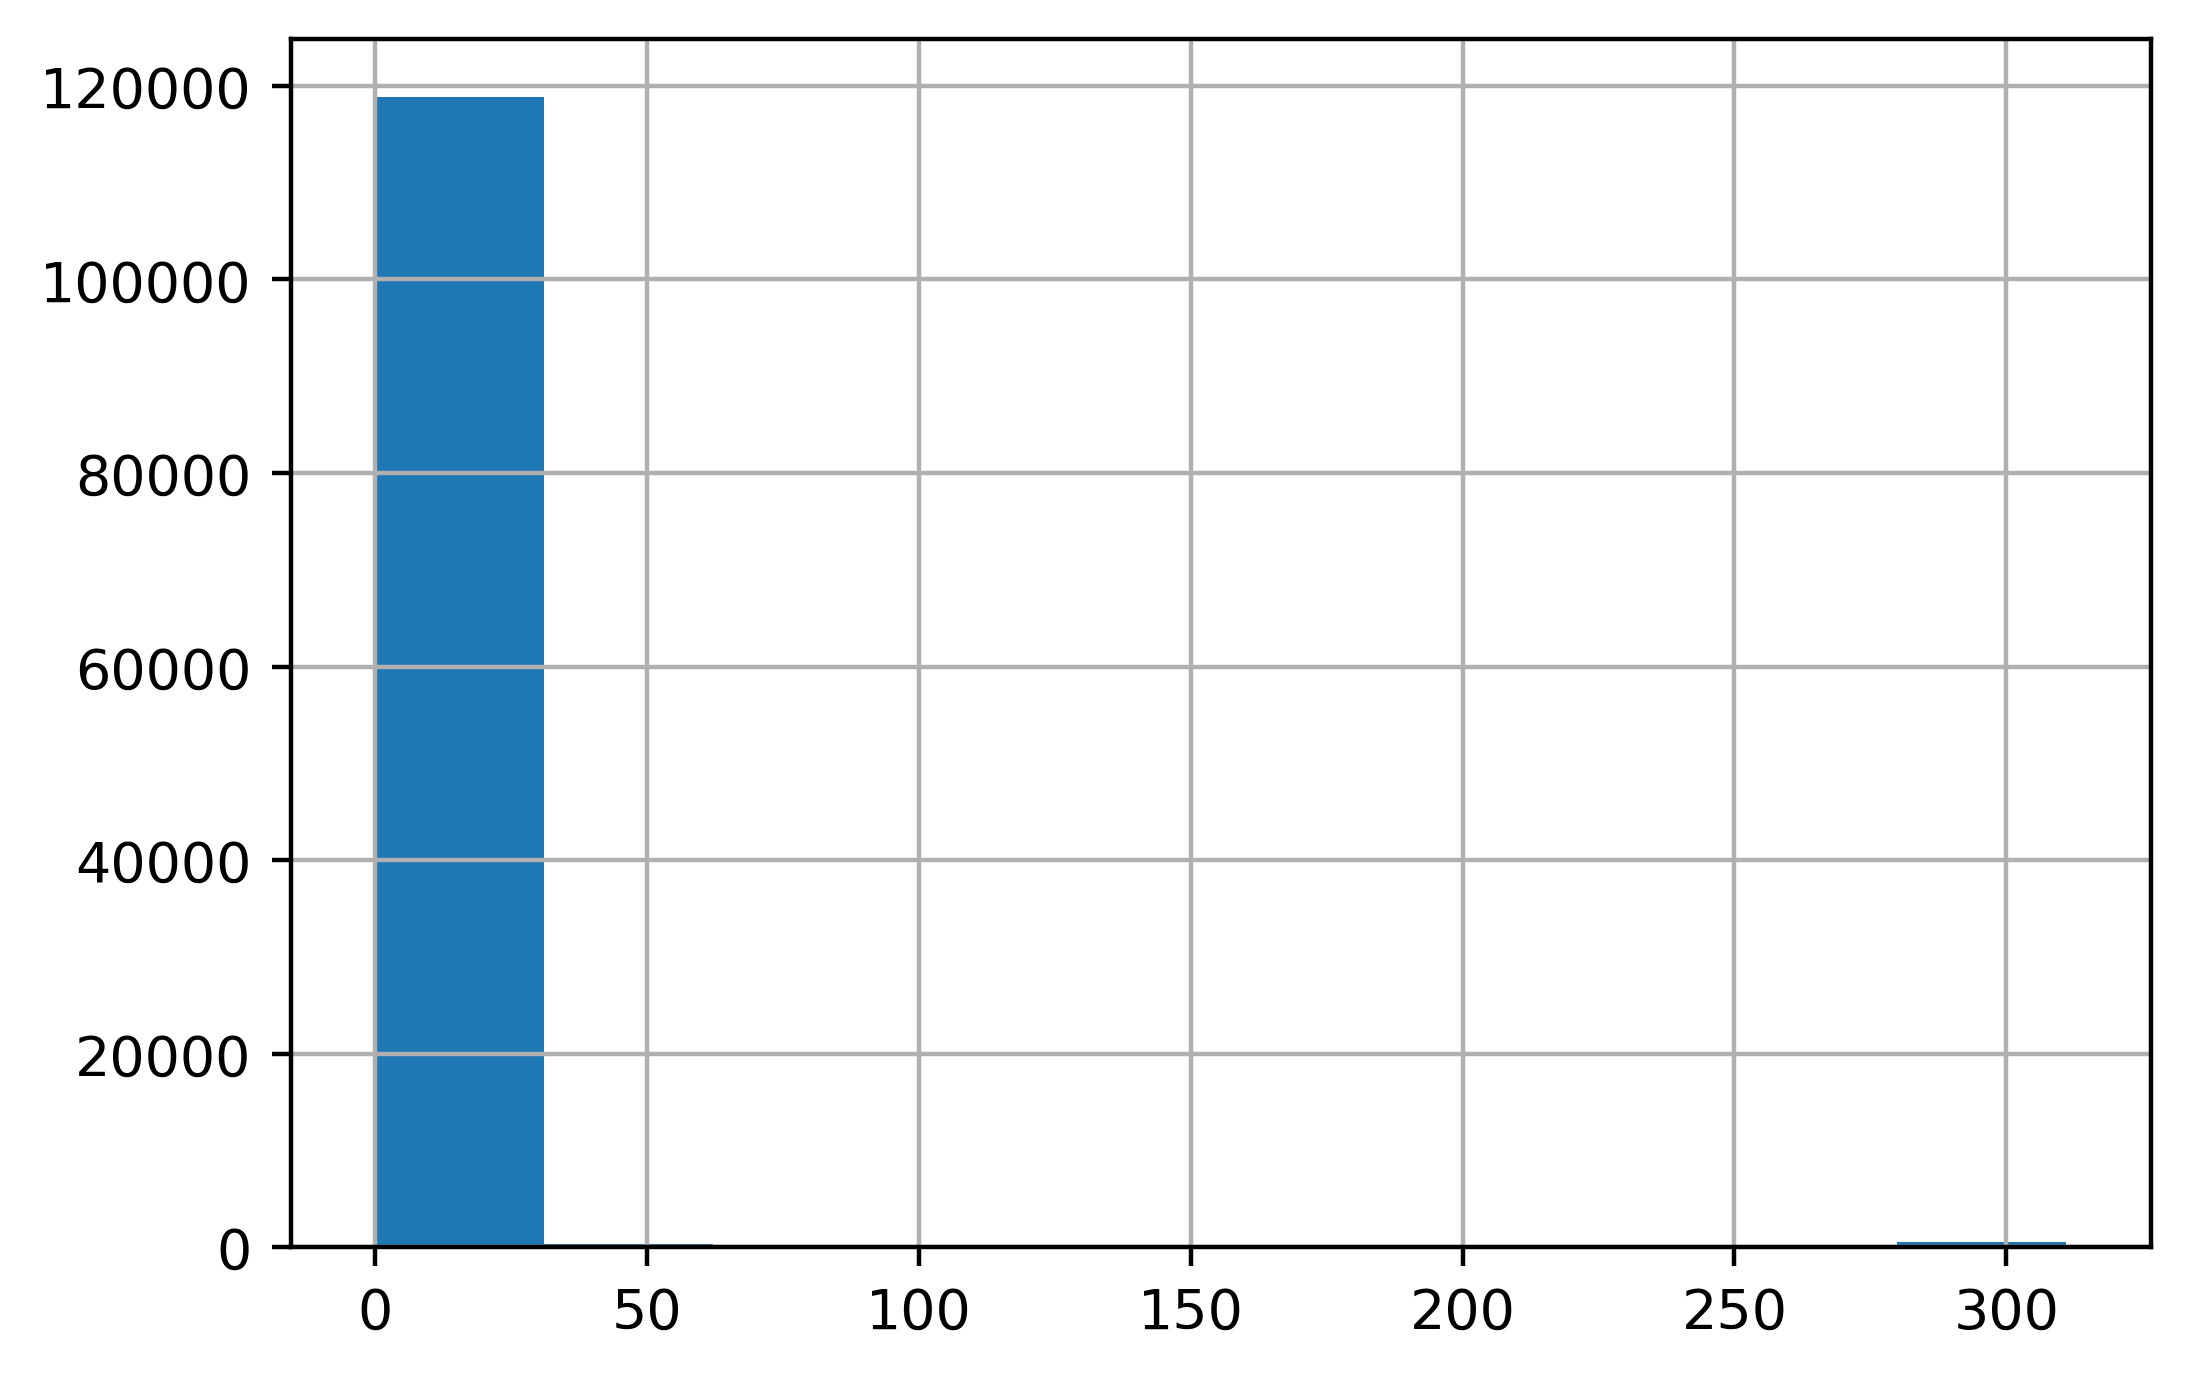

In [26]:
df['FlowDuration'].hist()

In [27]:
df[['PacketExed']].describe()

,PacketExed
count,1.200080e+05
mean,3.481002e+01
std,3.495729e+03
min,1.000000e+00
25%,1.000000e+00
50%,3.000000e+00
75%,9.000000e+00
max,1.003449e+06


In [28]:
flow_count = df['PacketExed'].value_counts()

In [29]:
flow_count.head()

1    49925
2     7081
4     6942
5     6705
3     6369
Name: PacketExed, dtype: int64

In [30]:
label_count = df['Label'].value_counts()

In [31]:
label_count

1    99998
0    20010
Name: Label, dtype: int64

In [32]:
flow_mask = df['PacketExed'] >1000.0

In [33]:
flow_mask[0:5]

0    False
2    False
3    False
4    False
5    False
Name: PacketExed, dtype: bool

In [34]:
sum(flow_mask)

206

In [35]:
df_sample = df.loc[flow_mask,:].copy()

In [36]:
df_sample

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,ForwardingStatus,TypeofService,PacketExed,Bytes
1752,1,39167,81.308,624992581,719035677,58844,443,1,0,0,1473,113413.0
3497,1,39170,55.120,1319157552,719036248,443,55236,1,0,40,1815,2482524.0
3988,1,39171,0.432,3692409786,719035195,80,50717,1,0,8,1490,2176834.0
4627,1,39172,0.332,3692409602,719036341,80,49957,1,0,8,1895,2705475.0
5504,1,39173,105.892,708974170,719036249,161,63061,2,0,0,1081,92482.0
...,...,...,...,...,...,...,...,...,...,...,...,...
120005,0,69043,10.312,633161166,719035623,22,52962,1,0,0,37855,6955484.0
120006,0,69083,17.164,633161166,719035623,22,52974,1,0,0,34850,6736949.0
120007,0,69164,15.192,633161166,719035623,22,52983,1,0,0,37487,6916425.0
120008,0,69200,14.948,633161166,719035623,22,53002,1,0,0,35695,6797353.0


In [37]:
label_count = df_sample['Label'].value_counts()

In [38]:
label_count

1    177
0     29
Name: Label, dtype: int64

In [39]:
label_mask = df['Label'] == 0

In [40]:
label_mask[0:5]

0    False
2    False
3    False
4    False
5    False
Name: Label, dtype: bool

In [41]:
sum(label_mask)

20010

In [42]:
df_sample_bad = df.loc[label_mask,:].copy()

In [43]:
df_sample_bad.head()

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,ForwardingStatus,TypeofService,PacketExed,Bytes
100000,0,39180,0.000,1302970731,719034823,0,771,3,0,0,1,88.0
100001,0,39218,1.360,4161214233,719034713,443,57667,1,0,72,3,120.0
100002,0,39218,1.368,4161214233,719034713,443,57665,1,0,72,3,120.0
100003,0,39224,1.136,1010349080,719036146,80,36514,1,0,0,4,565.0
100004,0,39224,1.036,1010349080,719036146,443,38389,1,0,0,85,106492.0


In [44]:
df_sample_bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20010 entries, 100000 to 120009
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Label             20010 non-null  int64  
 1   Timestamp         20010 non-null  int64  
 2   FlowDuration      20010 non-null  float64
 3   SrcIP             20010 non-null  int64  
 4   DstIP             20010 non-null  int64  
 5   SrcPort           20010 non-null  int64  
 6   DstPort           20010 non-null  int64  
 7   Protocol          20010 non-null  int64  
 8   ForwardingStatus  20010 non-null  int64  
 9   TypeofService     20010 non-null  int64  
 10  PacketExed        20010 non-null  int64  
 11  Bytes             20010 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 2.0 MB


In [45]:
df_sample_bad.nunique()

Label                   1
Timestamp            8593
FlowDuration         1549
SrcIP                 175
DstIP                2041
SrcPort              3632
DstPort             12708
Protocol                3
ForwardingStatus        1
TypeofService           6
PacketExed            154
Bytes                1008
dtype: int64

In [46]:
df.nunique()

Label                   2
Timestamp            8707
FlowDuration         5760
SrcIP               21200
DstIP                2731
SrcPort             35765
DstPort             25825
Protocol                6
ForwardingStatus        1
TypeofService          25
PacketExed            723
Bytes                8881
dtype: int64

In [47]:
df_sample_bad.head(10)

,Label,Timestamp,FlowDuration,SrcIP,DstIP,SrcPort,DstPort,Protocol,ForwardingStatus,TypeofService,PacketExed,Bytes
100000,0,39180,0.000,1302970731,719034823,0,771,3,0,0,1,88.0
100001,0,39218,1.360,4161214233,719034713,443,57667,1,0,72,3,120.0
100002,0,39218,1.368,4161214233,719034713,443,57665,1,0,72,3,120.0
100003,0,39224,1.136,1010349080,719036146,80,36514,1,0,0,4,565.0
100004,0,39224,1.036,1010349080,719036146,443,38389,1,0,0,85,106492.0
100005,0,39288,1.220,1010349081,719036146,80,54556,1,0,0,4,565.0
100006,0,39288,1.108,1010349081,719036146,443,36025,1,0,0,84,106436.0
100007,0,39356,0.840,1010349080,719036146,80,36953,1,0,0,4,565.0
100008,0,39356,0.736,1010349081,719036146,443,36256,1,0,0,81,106316.0
100009,0,39389,0.452,1010349069,719034991,443,35852,1,0,0,10,5658.0
